In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymongo import MongoClient
import datetime

In [57]:
timeSeriesCountData = pd.DataFrame(columns=['symbol','date','count'])

In [58]:
client = MongoClient('mongodb://127.0.0.1:27017/')
db = client['mph']
collection_agg = db['token_aggs']

In [59]:
agg_data = collection_agg.find({'symbol':'LAT'})

In [60]:
index1 = 0

for agg_detail in agg_data:
    timeSeriesCountData.loc[index1, 'symbol'] = agg_detail['symbol']
    timeSeriesCountData.loc[index1,'date']= datetime.datetime.strptime(str(agg_detail['date']),'%Y%m%d')
    timeSeriesCountData.loc[index1, 'count'] = agg_detail['count'] # nomarlization
    index1+=1

In [61]:
timeSeriesCountData = timeSeriesCountData.sort_values(['date'])

In [62]:
startDate1 = "2018-03-02"
endDate1 = "2019-12-04"

startDate = datetime.datetime.strptime(startDate1,"%Y-%m-%d")
endDate = datetime.datetime.strptime(endDate1,"%Y-%m-%d")

monthDate = startDate +pd.DateOffset(months=3)

In [63]:
timeSeriesCountData1 = timeSeriesCountData.loc[(timeSeriesCountData['date'] >= startDate) & (timeSeriesCountData['date'] <= endDate), :]

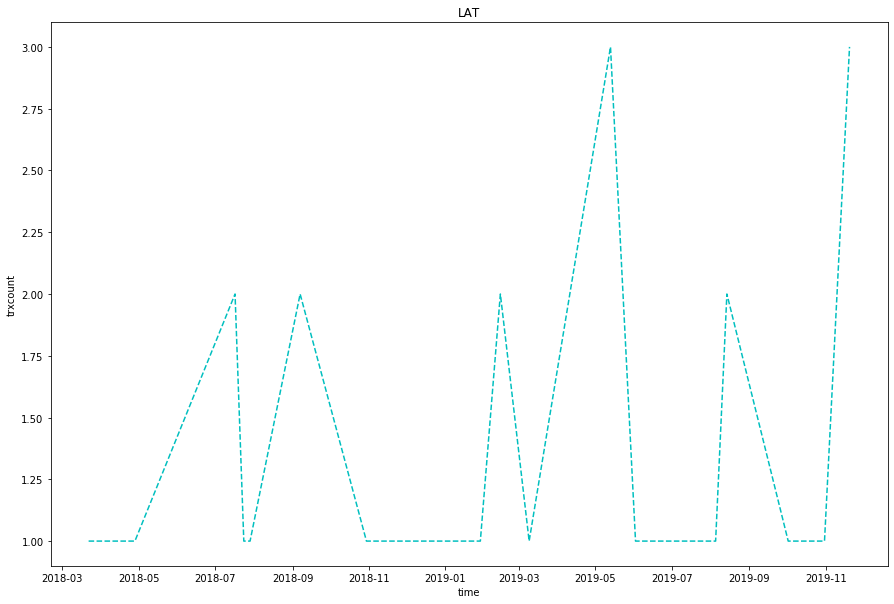

In [64]:
plt.figure(figsize=(15,10))
plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['count'].values, 'c--')
plt.title("LAT")
plt.xlabel('time')
plt.ylabel('trxcount')
plt.show()

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


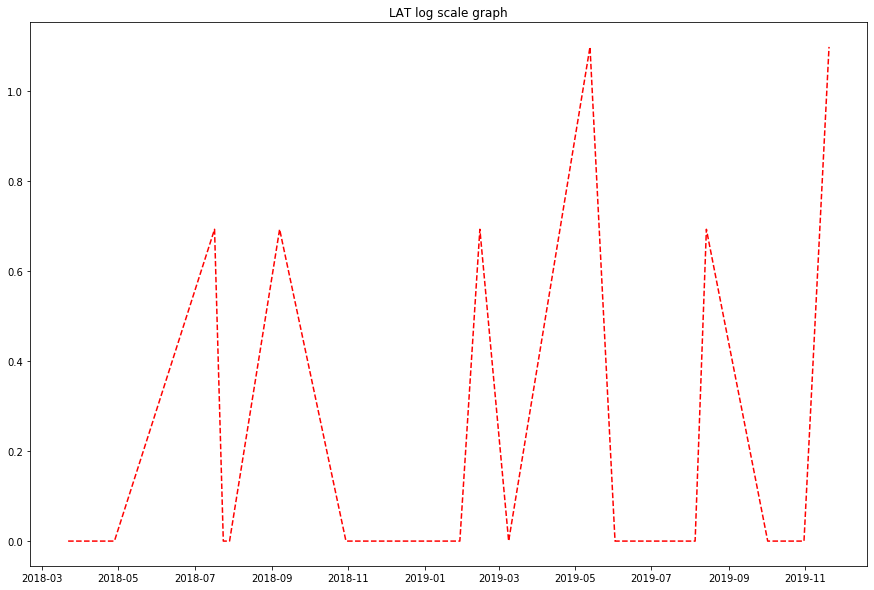

In [65]:
plt.figure(figsize=(15,10))
timeSeriesCountData1['log_count'] = np.log(np.array(timeSeriesCountData1['count'],dtype=np.float32))

plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['log_count'].values, 'r--')
plt.title('LAT log scale graph')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

In [71]:
scaler = StandardScaler()

In [76]:
timeSeriesCountData1

,symbol,date,count,log_count
23,LAT,2018-03-22 00:00:00,1,0.000000
16,LAT,2018-03-27 00:00:00,1,0.000000
25,LAT,2018-04-28 00:00:00,1,0.000000
53,LAT,2018-07-17 00:00:00,2,0.693147
46,LAT,2018-07-24 00:00:00,1,0.000000
27,LAT,2018-07-29 00:00:00,1,0.000000
17,LAT,2018-09-07 00:00:00,2,0.693147
29,LAT,2018-10-30 00:00:00,1,0.000000
55,LAT,2018-12-06 00:00:00,1,0.000000
48,LAT,2018-12-17 00:00:00,1,0.000000


In [77]:
data = timeSeriesCountData1[['log_count']]

In [78]:
np_scaled = scaler.fit_transform(data)

In [79]:
np_scaled

array([[-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [ 1.54159274],
       [-0.48414666],
       [-0.48414666],
       [ 1.54159274],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [ 1.54159274],
       [-0.48414666],
       [ 2.72657438],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [ 1.54159274],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [-0.48414666],
       [ 2.72657438]])

In [80]:
data = pd.DataFrame(np_scaled)

In [117]:
model = OneClassSVM(nu=0.1,kernel="rbf",gamma=0.01)

In [118]:
model.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [119]:
timeSeriesCountData1['anomaly'] = pd.Series(model.predict(data))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
timeSeriesCountData1

,symbol,date,count,log_count,anomaly,label
23,LAT,2018-03-22 00:00:00,1,0.000000,-1.0,0
16,LAT,2018-03-27 00:00:00,1,0.000000,-1.0,0
25,LAT,2018-04-28 00:00:00,1,0.000000,-1.0,0
53,LAT,2018-07-17 00:00:00,2,0.693147,NaN,1
46,LAT,2018-07-24 00:00:00,1,0.000000,NaN,0
27,LAT,2018-07-29 00:00:00,1,0.000000,-1.0,0
17,LAT,2018-09-07 00:00:00,2,0.693147,-1.0,1
29,LAT,2018-10-30 00:00:00,1,0.000000,-1.0,0
55,LAT,2018-12-06 00:00:00,1,0.000000,NaN,0
48,LAT,2018-12-17 00:00:00,1,0.000000,NaN,0


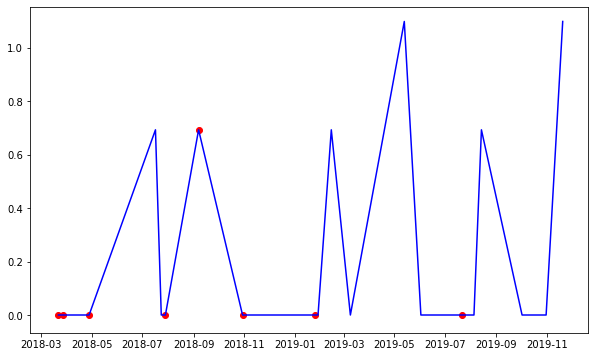

In [121]:
fig, ax = plt.subplots(figsize=(10,6))
a = timeSeriesCountData1.loc[timeSeriesCountData1['anomaly'] == -1, ['date', 'log_count']] #anomaly
ax.plot(timeSeriesCountData1['date'], timeSeriesCountData1['log_count'], color='blue')
ax.scatter(a['date'],a['log_count'], color='red')

In [122]:
from sklearn.cluster import KMeans
X = timeSeriesCountData1[['log_count']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
labels = km.labels_

In [123]:
labels

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

In [124]:
timeSeriesCountData1['label']=labels

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


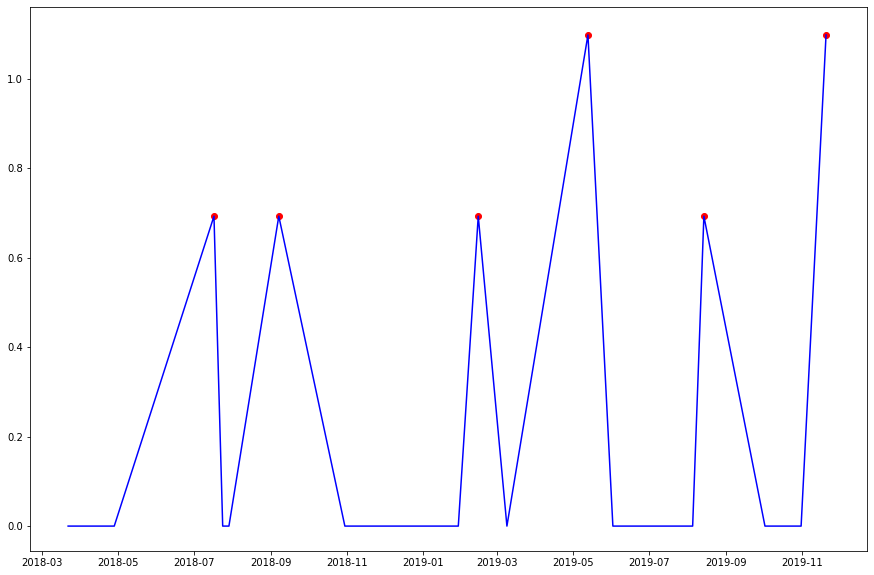

In [125]:
fig1, bx = plt.subplots(figsize=(15,10))
b = timeSeriesCountData1.loc[timeSeriesCountData1['label'] == 1, ['date', 'log_count']] #anomaly
bx.plot(timeSeriesCountData1['date'], timeSeriesCountData1['log_count'], color='blue')
bx.scatter(b['date'],b['log_count'], color='red')